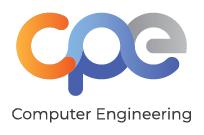

### CPE371: Big Data Engineering
### Iots and Big Data
### Assignment 2: Design the "topic" for MQTT then testing for publishing and subscribing

This is plan of "CPE_HOUSE"   
   
   
![CPE325HOUSE](./assignment2.png)

we have 2 type of IoT node: the Temperature and Humidity Sensors and the LED Controllers  
we would like to display temperature and humidity of every sensors and control "ON"/"OFF" every LEDs and display the LEDs' status as well.  
**Example:** The Topic, it could be like this:  
   

 *  /CPE_HOUSE/LAUNDRY/temperature  
 *  /CPE_HOUSE/LAUNDRY/humidity  
 *  /CPE_HOUSE/LAUNDRY/LED/status     **use for display status of LED "ON"/"OFF" or 1/0**   
 *  /CPE_HOUSE/LAUNDRY/LED/set        **use for set status of LED to "ON"/"OFF" or 1/0**  


### Instructions   
1. seperate your group to 2 teams (as **publisher** team and **subscriber** team)  
2. **for publisher** use "play_mqtt_publisher.ipynb" as an example:  
    2.1 use this file and add the **publisher** code below  
    2.2 make a loop for publish the data of all topics to MQTT broker server "broker.mqttdashboard.com"  
    2.3 repeatly publish the data every 5 seconds or 10 seconds (Try to change a data by a little to make the different value or create a CSV file as datalog)  
    
3. **for subscriber** use "play_mqtt_subscriber.ipynb" as an example:  
    3.1 subscribe the topic to display the data from MQTT broker server "broker.mqttdashboard.com"  
    3.2 practice by change your subscribe topic and see which data will send to you  
4. send these files (keep the result of running) to LEB2:
    1. publisher code (this file)
    2. subscriber code (write in another ipynb file)

In [ ]:
import paho.mqtt.client as mqtt
import random
import time
MQTT_HOST = "broker.mqttdashboard.com"
MQTT_PORT = 1883
MQTT_KEEPALIVE_INTERVAL = 60 #60 seconds
MQTT_TOPIC = "CPE_HOUSE"

def on_publish(self,client,userdata):
    print("Message Published...")


client = mqtt.Client()
client.on_publish = on_publish
client.connect(MQTT_HOST,MQTT_PORT,MQTT_KEEPALIVE_INTERVAL)

In [ ]:
topic_hierarchy = {
    "LAUNDRY" : ["temperature","humidity","light"],
    "LIVING" : ["temperature","humidity","light"],
    "DINING" :["light"],
    "KITCHEN" : ["temperature","humidity","light"],
    "WINE_CELLAR" : ["temperature","humidity"],
    "TERRACE" : ["temperature","humidity","light"],
    "GUEST_BEDROOM" : ["temperature","humidity"],
    "GARAGE" : ["light"],
    "GYM" : ["temperature","humidity","light"],
    "PATIO" : ["light"],
    "BATH" : ["light"],
    "TERRACE2" : ["light"],
}

base_temperatures = {
    "LAUNDRY": 25,
    "LIVING": 22,
    "DINING": 23,
    "KITCHEN": 27,
    "WINE_CELLAR": 15,
    "TERRACE": 20,
    "GUEST_BEDROOM": 21,
    "GARAGE": 18,
    "GYM": 24,
}

base_humidity = {
    "LAUNDRY": 70,
    "LIVING": 45,
    "DINING": 40,
    "KITCHEN": 60,
    "WINE_CELLAR": 80,
    "TERRACE": 50,
    "GUEST_BEDROOM": 45,
    "GARAGE": 35,
    "GYM": 55,
}

led_states = {}
for room, capabilities in topic_hierarchy.items():
    if "light" in capabilities:
        led_states[room] = "0"  # 0 = OFF, 1 = ON

In [ ]:
while True:
    for room, capabilities in topic_hierarchy.items():
        
        if "temperature" in capabilities:
            base_temp = base_temperatures.get(room, 22)  # Default to 22°C
            current_temp = round(base_temp + random.uniform(-5, 5), 1)
            
            temp_topic = f"CPE_HOUSE/{room}/temperature"
            temp_message = str(current_temp)
            
            client.publish(temp_topic, temp_message, qos=0, retain=True)
            print(f"Published: {temp_topic} -> {current_temp}°C")
        
        if "humidity" in capabilities:
            base_humid = base_humidity.get(room, 50)  # Default to 50%
            current_humid = round(base_humid + random.uniform(-15, 15), 1)
            current_humid = max(20, min(90, current_humid))
            
            humid_topic = f"CPE_HOUSE/{room}/humidity"
            humid_message = str(current_humid)
            
            client.publish(humid_topic, humid_message, qos=0, retain=True)
            print(f"Published: {humid_topic} -> {current_humid}%")
        
        if "light" in capabilities:
            led_status_topic = f"CPE_HOUSE/{room}/LED/status"
            current_led_state = led_states[room]

            
            client.publish(led_status_topic.replace("status","set"), current_led_state, qos=0, retain=True)
            client.publish(led_status_topic, current_led_state, qos=0, retain=True)
            print(f"Published: {led_status_topic} -> {current_led_state}")
    print("-"*50)
    time.sleep(10)
    